In [4]:
## import the necessary packages 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set()

In [5]:
## load in the data 
data = pd.read_csv("la-riots-deaths.csv")

In [6]:
## check whats in the data
data.head()

,first,last,Full Name,Solved*,Age,Gender,Race,Date,Address,Neighborhood,status,lat,lon,Map Description,Story,URL
0,Cesar A.,Aguilar,Cesar A. Aguilar,NaN,18,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer involved shooting,-118.273976,34.059281,"Cesar Aguilar, an 18-year-old Latino, was shot...","Cesar Aguilar, an 18-year-old Latino, was shot...",http://articles.latimes.com/print/1992-06-21/n...
1,George,Alvarez,George Alvarez,NaN,42,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690,"George Alvarez, a 42-year-old Latino, died Fri...","George Alvarez, a 42-year-old Latino, died Fri...",NaN
2,Wilson,Alvarez,Wilson Alvarez,Unsolved,40,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662,"Wilson Alvarez, a 40-year-old Latino, died of ...","Wilson Alvarez, a 40-year-old Latino, died of ...",NaN
3,Brian E.,Andrew,Brian E. Andrew,NaN,30,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer involved shooting,-118.215390,33.903457,"Brian E. Andrew, a 30-year-old black man, was ...","Brian E. Andrew, a 30-year-old black man, was ...",http://articles.latimes.com/print/1992-05-24/n...
4,Vivian,Austin,Vivian Austin,NaN,87,Female,Black,5/3/1992,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667,"Vivian Austin, an 87-year-old black woman, die...","Vivian Austin, an 87-year-old black woman, die...",NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 16 columns):
first              63 non-null object
last               63 non-null object
Full Name          63 non-null object
Solved*            36 non-null object
Age                63 non-null object
Gender             63 non-null object
Race               63 non-null object
Date               63 non-null object
Address            63 non-null object
Neighborhood       63 non-null object
status             63 non-null object
lat                62 non-null float64
lon                62 non-null float64
Map Description    63 non-null object
Story              63 non-null object
URL                28 non-null object
dtypes: float64(2), object(14)
memory usage: 8.0+ KB


In [8]:
## checking for missing values 
data.isnull().sum()

first               0
last                0
Full Name           0
Solved*            27
Age                 0
Gender              0
Race                0
Date                0
Address             0
Neighborhood        0
status              0
lat                 1
lon                 1
Map Description     0
Story               0
URL                35
dtype: int64

from here the missing value in the URL column does not really matter , but we have a problem in the solved* column due to some factors of missing data or it was not recorded.   

In [15]:
## we have to fill the missing values 
data["Solved*"].fillna(("Unsolved"), inplace = True)

In [17]:
## fill null values for lat and lon 
data["lat"].fillna((data["lat"].mean()), inplace = True)
data["lon"].fillna((data["lon"].mean()), inplace = True)

In [19]:
## drop the url column 
data.drop("URL", axis = 1, inplace = True)

In [20]:
## we check for comfirmation to see if our code is correct 
data.isnull().sum()

first              0
last               0
Full Name          0
Solved*            0
Age                0
Gender             0
Race               0
Date               0
Address            0
Neighborhood       0
status             0
lat                0
lon                0
Map Description    0
Story              0
dtype: int64

In [21]:
data.head()

,first,last,Full Name,Solved*,Age,Gender,Race,Date,Address,Neighborhood,status,lat,lon,Map Description,Story
0,Cesar A.,Aguilar,Cesar A. Aguilar,Unsolved,18,Male,Latino,1992-04-30,2009 W. 6th St.,Westlake,Officer involved shooting,-118.273976,34.059281,"Cesar Aguilar, an 18-year-old Latino, was shot...","Cesar Aguilar, an 18-year-old Latino, was shot..."
1,George,Alvarez,George Alvarez,Unsolved,42,Male,Latino,1992-05-01,Main & College streets,Chinatown,Not riot-related,-118.234098,34.062690,"George Alvarez, a 42-year-old Latino, died Fri...","George Alvarez, a 42-year-old Latino, died Fri..."
2,Wilson,Alvarez,Wilson Alvarez,Unsolved,40,Male,Latino,1992-05-23,3100 Rosecrans Ave.,Hawthorne,Homicide,-118.326816,33.901662,"Wilson Alvarez, a 40-year-old Latino, died of ...","Wilson Alvarez, a 40-year-old Latino, died of ..."
3,Brian E.,Andrew,Brian E. Andrew,Unsolved,30,Male,Black,1992-04-30,Rosecrans & Chester avenues,Compton,Officer involved shooting,-118.215390,33.903457,"Brian E. Andrew, a 30-year-old black man, was ...","Brian E. Andrew, a 30-year-old black man, was ..."
4,Vivian,Austin,Vivian Austin,Unsolved,87,Female,Black,5/3/1992,1600 W. 60th St.,Harvard Park,Death,-118.304741,33.985667,"Vivian Austin, an 87-year-old black woman, die...","Vivian Austin, an 87-year-old black woman, die..."


In [22]:
data.describe()

,lat,lon
count,63.000000,63.000000
mean,-118.280793,34.027561
std,0.104965,0.098241
min,-118.471745,33.789858
25%,-118.309913,33.971686
50%,-118.291495,34.020622
75%,-118.254026,34.069612
max,-117.730647,34.287098


In [23]:
data.shape

(63, 15)

In [24]:
## check the columns
data.columns

Index(['first', 'last', 'Full Name', 'Solved*', 'Age', 'Gender', 'Race',
       'Date', 'Address', 'Neighborhood', 'status', 'lat', 'lon',
       'Map Description', 'Story'],
      dtype='object')

## Visualization

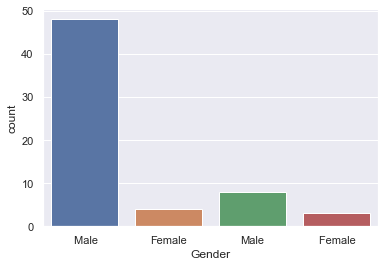

In [29]:
## who died the most male or female
sns.countplot(data["Gender"])

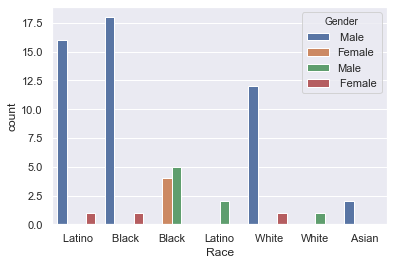

In [30]:
## who died most male or female
sns.countplot(data["Race"],hue=data["Gender"])

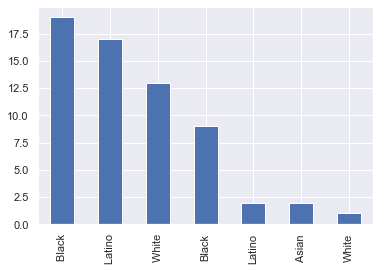

In [35]:
data["Race"].value_counts().plot(kind="bar")

In [ ]:
## for double words showing when visualizing 
new race = data.race.map(lambda p:p.replace("", ""))